In [ ]:
# Install & import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
# Load the dataset

In [ ]:
df = pd.read_csv('/content/coin_Aave.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2020-10-05 23:59:59,1,Aave,AAVE,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
2020-10-06 23:59:59,2,Aave,AAVE,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2020-10-07 23:59:59,3,Aave,AAVE,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
2020-10-08 23:59:59,4,Aave,AAVE,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
2020-10-09 23:59:59,5,Aave,AAVE,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [ ]:
# Plot the closing price

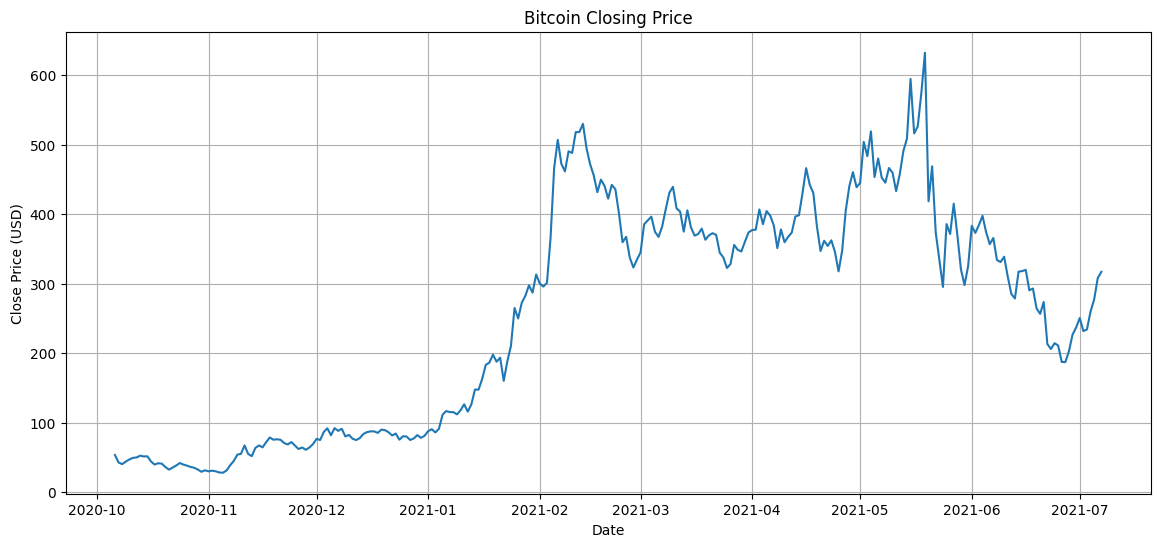

In [ ]:
plt.figure(figsize=(14, 6))
plt.title("Bitcoin Closing Price")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

In [ ]:
# Prepare Data for LSTM

In [ ]:
data = df[['Close']]
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

training_data_len = int(np.ceil(len(dataset) * 0.8))

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Built & Train LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=64, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.1975
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0407
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0370
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0225
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0111
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0151
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0170
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0102
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0094
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0116


In [ ]:
# Test Dataset & Predictions

In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step


In [ ]:
# Visualize Resuls

/tmp/ipython-input-10-1019155034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


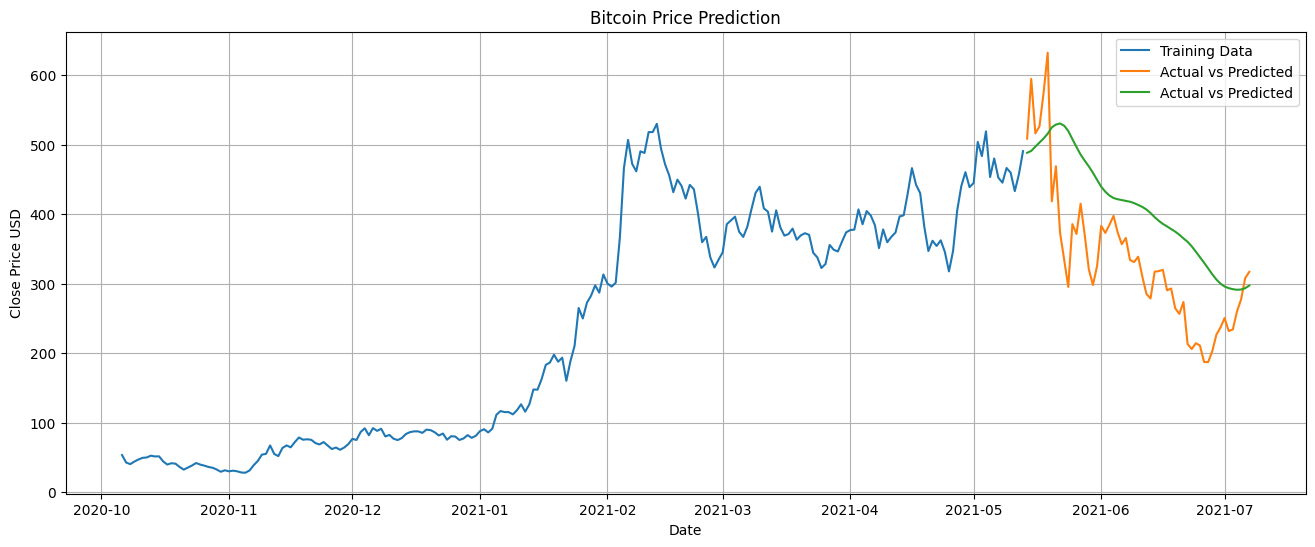

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title("Bitcoin Price Prediction")
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close', 'Predictions']], label='Actual vs Predicted')
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation

In [ ]:
rmse = np.sqrt(mean_squared_error(valid['Close'], valid['Predictions']))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 100.90792719575681
